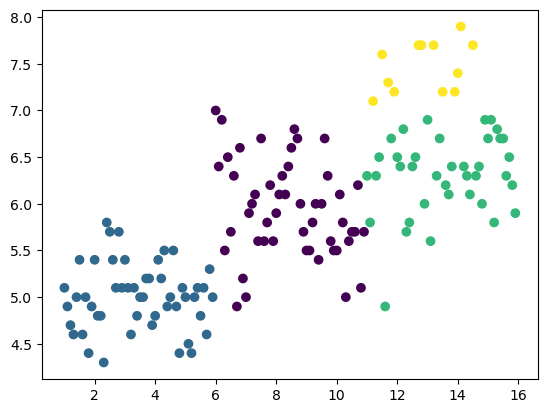

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [1]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import numpy as np
import tensorflow
from keras import layers
import keras
import requests

df= pd.read_csv("C:/Users/loq/Projects/Iris Dataset/Iris.csv")

del df["Id"]
df["Species"]= df["Species"].map({"Iris-setosa":1, "Iris-virginica":3})
df["Species"] = df["Species"].fillna(2)
Mc= AgglomerativeClustering(n_clusters=4,metric="euclidean", linkage= "ward")
Mc.fit(df)
labels= Mc.fit_predict(df)
pyplot.scatter(np.arange(1,16,.1), np.array(df["SepalLengthCm"]), c=labels)
pyplot.show()
labels

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

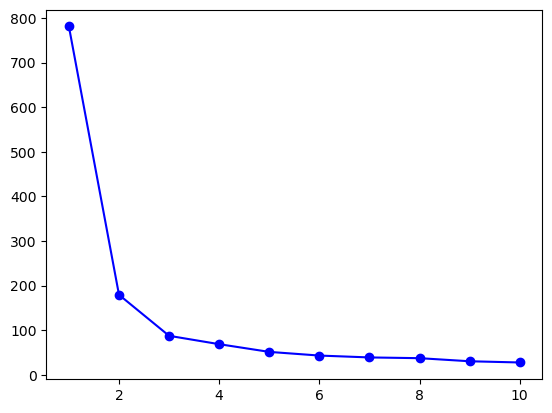

In [2]:
## this code is for kMeans clustering
inertia_range = range(1,11)
inertias = []
for i in inertia_range:
    model= sklearn.cluster.KMeans(n_clusters = i)
    model.fit(df)
    inertias.append(model.inertia_)
pyplot.plot(inertia_range, inertias, "o-b")

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


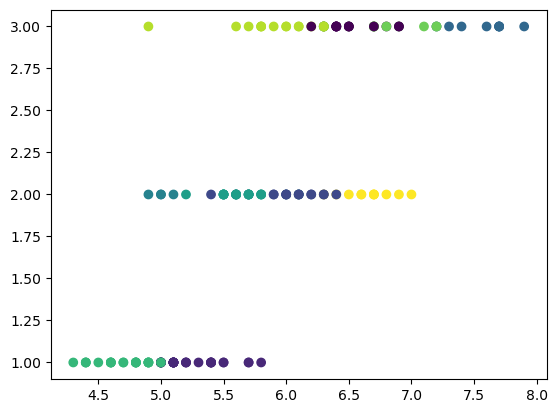

In [3]:
modelk = sklearn.cluster.KMeans(n_clusters= 3)
modelk.fit(df)
labels= model.predict(df)
pyplot.scatter(df["SepalLengthCm"], df["Species"], c=labels)

In [5]:
scaler = StandardScaler()
scaled_data= scaler.fit_transform(df)
modelk.fit(scaled_data)
labels = modelk.predict(scaled_data)
newdf = pd.DataFrame({"Species": df["Species"], "label":labels})
pd.crosstab(newdf["Species"], newdf["label"])

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


label,0,1,2
Species,,,
1.0,0,50,0
2.0,5,0,45
3.0,43,0,7


In [7]:
X= np.array(df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
Y= np.array(df["Species"])
models = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(4, activation="relu", input_shape=[4]),
    tensorflow.keras.layers.Dense(50, activation="relu"),
    tensorflow.keras.layers.Dense(1, activation="relu")])
models.compile(loss = "mae", optimizer = "Adam")

E:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
models.fit(X,Y, epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.6660
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2560
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8360
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5679 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4009
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4339
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4505
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4222
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3936 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3726
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3638
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3360
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3328
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3283
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3011 
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━

In [9]:
newy= models.predict(np.array([5.5,2.3,4.0,1.3]).reshape(-1,4))
newy.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


array([[2.]], dtype=float32)